In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category="ConvergenceWarning") 

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df = df.rename(columns={'age': 'Umur'})
df = df.rename(columns={'gender': 'Jenis Kelamin'})
df = df.rename(columns={'hypertension': 'Tekanan Darah'})
df = df.rename(columns={'heart_disease': 'Penyakit Jantung'})
df = df.rename(columns={'smoking_history': 'Riwayat Merokok'})
df = df.rename(columns={'blood_glucose_level': 'Gula Darah'})
df

,Jenis Kelamin,Umur,Tekanan Darah,Penyakit Jantung,Riwayat Merokok,bmi,HbA1c_level,Gula Darah,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Duplicates: {df.duplicated().sum()}") 
print(f"missing data: {sum(df.isna().sum())}")

Rows: 100000, Columns: 9
Duplicates: 3854
missing data: 0


In [7]:
df.isnull().sum()

Jenis Kelamin       0
Umur                0
Tekanan Darah       0
Penyakit Jantung    0
Riwayat Merokok     0
bmi                 0
HbA1c_level         0
Gula Darah          0
diabetes            0
dtype: int64

In [8]:
df.drop_duplicates(keep= 'first',inplace = True) #menghapus data duplikat

In [9]:
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


In [10]:
df

,Jenis Kelamin,Umur,Tekanan Darah,Penyakit Jantung,Riwayat Merokok,bmi,HbA1c_level,Gula Darah,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [11]:
df['Jenis Kelamin'].value_counts()

Jenis Kelamin
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [12]:
df[df['Jenis Kelamin']== "Other"]

,Jenis Kelamin,Umur,Tekanan Darah,Penyakit Jantung,Riwayat Merokok,bmi,HbA1c_level,Gula Darah,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


In [13]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace('Other', 'Male')
df

,Jenis Kelamin,Umur,Tekanan Darah,Penyakit Jantung,Riwayat Merokok,bmi,HbA1c_level,Gula Darah,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [14]:
df['Riwayat Merokok'].value_counts()

Riwayat Merokok
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [15]:
df['Riwayat Merokok'] = df['Riwayat Merokok'].replace('never', 'Tidak')
df['Riwayat Merokok'] = df['Riwayat Merokok'].replace('No Info', 'Tidak Diketahui')
df['Riwayat Merokok'] = df['Riwayat Merokok'].replace('former', 'Mantan Perokok')
df['Riwayat Merokok'] = df['Riwayat Merokok'].replace('current', 'Saat Ini')
df['Riwayat Merokok'] = df['Riwayat Merokok'].replace('not current', 'Tidak Saat Ini')
df['Riwayat Merokok'] = df['Riwayat Merokok'].replace('ever', 'Pernah')
df

,Jenis Kelamin,Umur,Tekanan Darah,Penyakit Jantung,Riwayat Merokok,bmi,HbA1c_level,Gula Darah,diabetes
0,Female,80.0,0,1,Tidak,25.19,6.6,140,0
1,Female,54.0,0,0,Tidak Diketahui,27.32,6.6,80,0
2,Male,28.0,0,0,Tidak,27.32,5.7,158,0
3,Female,36.0,0,0,Saat Ini,23.45,5.0,155,0
4,Male,76.0,1,1,Saat Ini,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,Tidak Diketahui,24.60,4.8,145,0
99996,Female,2.0,0,0,Tidak Diketahui,17.37,6.5,100,0
99997,Male,66.0,0,0,Mantan Perokok,27.83,5.7,155,0
99998,Female,24.0,0,0,Tidak,35.42,4.0,100,0


In [16]:
df['Riwayat Merokok'].value_counts()

Riwayat Merokok
Tidak              34398
Tidak Diketahui    32887
Mantan Perokok      9299
Saat Ini            9197
Tidak Saat Ini      6367
Pernah              3998
Name: count, dtype: int64

<Axes: >

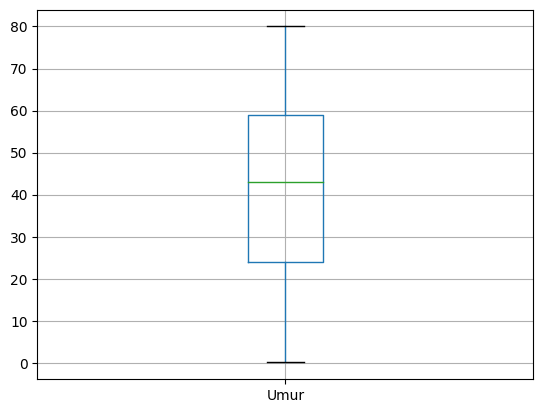

In [17]:
df[['Umur']].boxplot()


In [18]:
df['Jenis Kelamin'].value_counts()

Jenis Kelamin
Female    56161
Male      39985
Name: count, dtype: int64

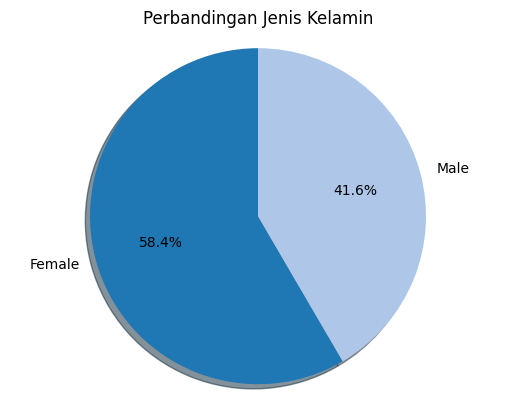

In [19]:
df_pie1 = df['Jenis Kelamin'].value_counts()

labels1 = df_pie1.index
quantity1 = df_pie1.values
colors1 = plt.cm.tab20(range(len(labels1)))

plt.title('Perbandingan Jenis Kelamin')
plt.pie(quantity1, labels=labels1, colors=colors1,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [20]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

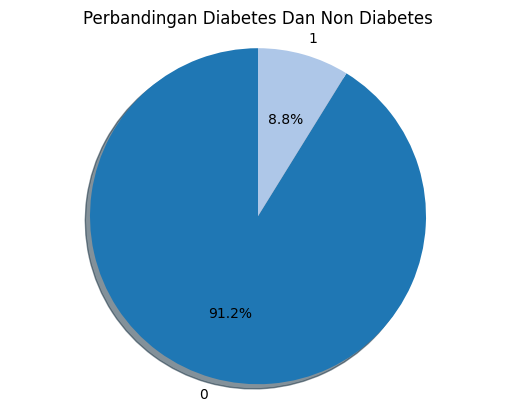

In [21]:
df_pie2 = df['diabetes'].value_counts()

labels2 = df_pie2.index
quantity2 = df_pie2.values
colors2 = plt.cm.tab20(range(len(labels2)))

plt.title('Perbandingan Diabetes Dan Non Diabetes')
plt.pie(quantity2, labels=labels2, colors=colors2,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Jenis Kelamin     96146 non-null  object 
 1   Umur              96146 non-null  float64
 2   Tekanan Darah     96146 non-null  int64  
 3   Penyakit Jantung  96146 non-null  int64  
 4   Riwayat Merokok   96146 non-null  object 
 5   bmi               96146 non-null  float64
 6   HbA1c_level       96146 non-null  float64
 7   Gula Darah        96146 non-null  int64  
 8   diabetes          96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [23]:
df['Riwayat Merokok'].value_counts()

Riwayat Merokok
Tidak              34398
Tidak Diketahui    32887
Mantan Perokok      9299
Saat Ini            9197
Tidak Saat Ini      6367
Pernah              3998
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping1 = {'Male':0,'Female':1,}
mapping2 = {'Tidak':0,'Tidak Diketahui':1,'Mantan Perokok':2,'Saat Ini':3,'Tidak Saat Ini':4,'Pernah':5}
df['Jenis Kelamin'] = le.fit_transform(df['Jenis Kelamin'].map(mapping1))
df['Riwayat Merokok'] = le.fit_transform(df['Riwayat Merokok'].map(mapping2))
df

,Jenis Kelamin,Umur,Tekanan Darah,Penyakit Jantung,Riwayat Merokok,bmi,HbA1c_level,Gula Darah,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,1,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,3,23.45,5.0,155,0
4,0,76.0,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,1,36.0,0,0,1,24.60,4.8,145,0
99996,1,2.0,0,0,1,17.37,6.5,100,0
99997,0,66.0,0,0,2,27.83,5.7,155,0
99998,1,24.0,0,0,0,35.42,4.0,100,0


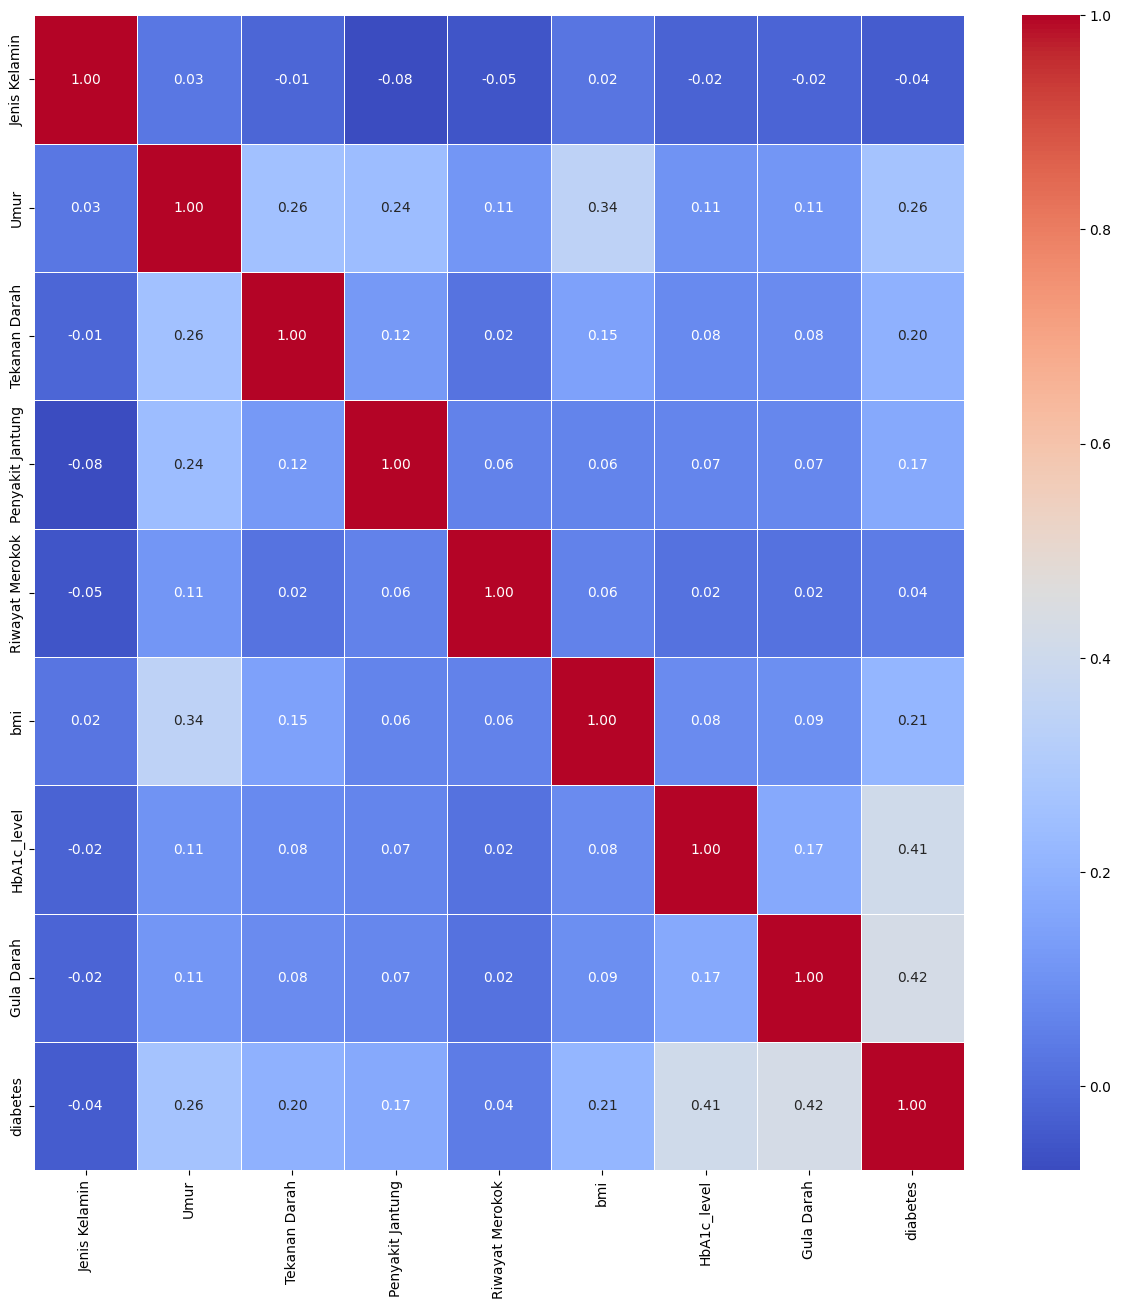

In [25]:
import matplotlib.pyplot as plt #korelasi hubungan antar variabel dapat dilihat dari korelasi di bawah
import seaborn as sns
plt.figure(figsize=(15,15))# bahwa Total_Phenols,Flavanoids, dan OD280 memliki pengaruh yang besar
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

In [26]:
import scipy
from scipy import stats

kolom=len(df.columns)
z=[]
for i in range (0,kolom-1):
  k,y=stats.pearsonr(df.iloc[:,i],df.iloc[:,-1])
  z.append([i,df.columns[i], abs(k)])

z=sorted(z, key=lambda z:z[2], reverse=True)
z=pd.DataFrame(z,columns=["KolomKe","Nama Kolom","KoefisienKorelasi-Pearson"])
z

,KolomKe,Nama Kolom,KoefisienKorelasi-Pearson
0,7,Gula Darah,0.424336
1,6,HbA1c_level,0.406408
2,1,Umur,0.264927
3,5,bmi,0.214932
4,2,Tekanan Darah,0.195710
5,3,Penyakit Jantung,0.170711
6,4,Riwayat Merokok,0.041441
7,0,Jenis Kelamin,0.037763


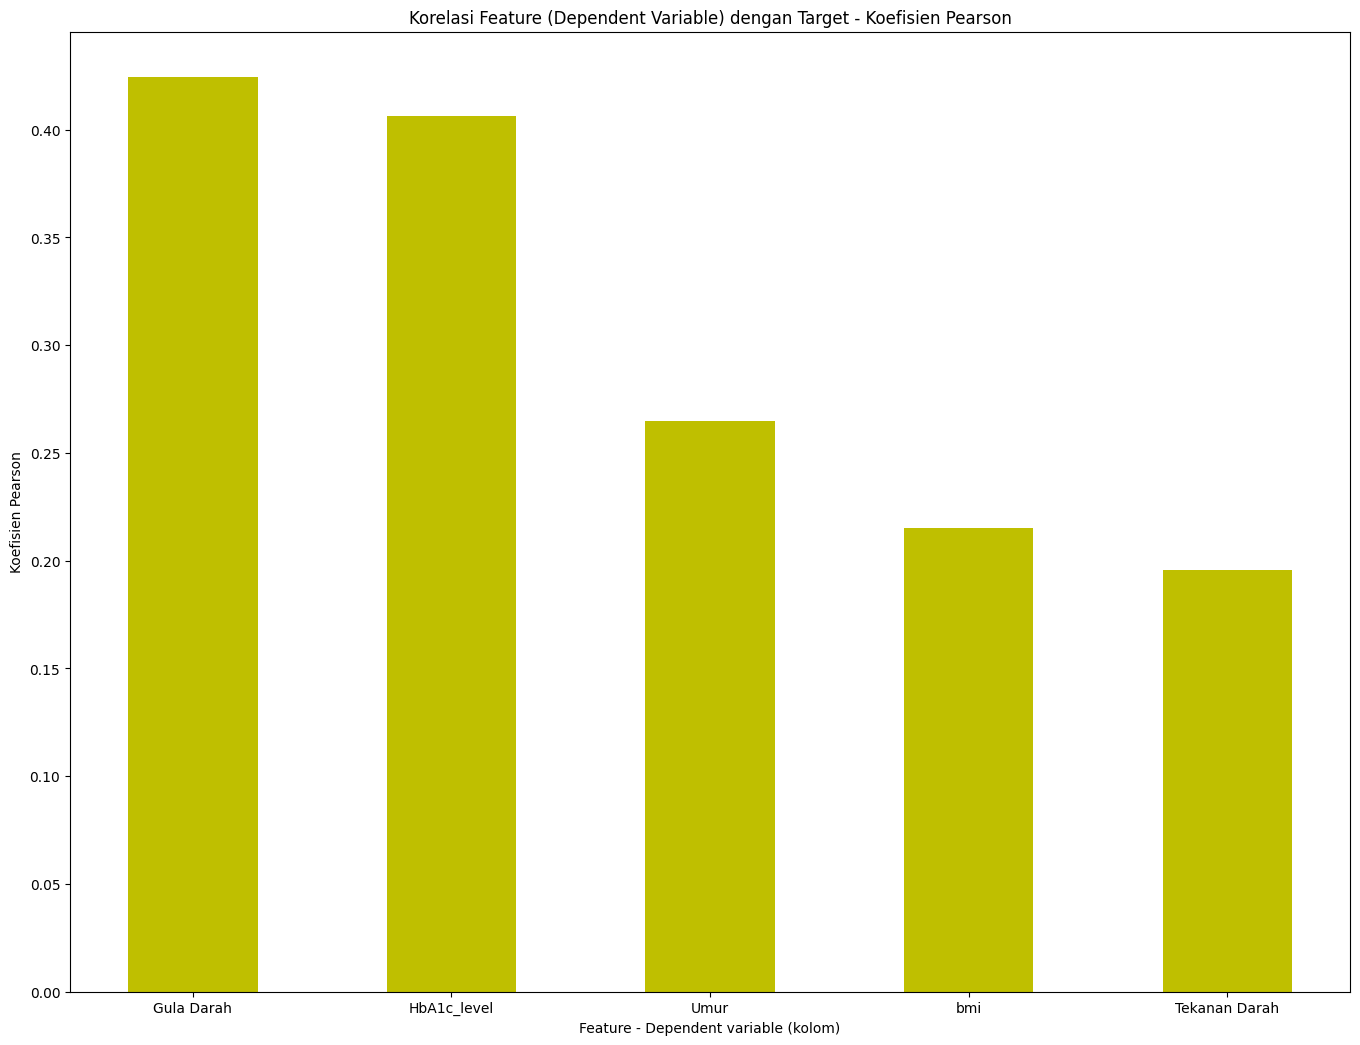

In [27]:
import matplotlib.pyplot as plt
g=z.head(5)
fig = plt.figure()

ax = fig.add_axes([1,1, 2, 2])
x_axis = g.iloc[:,1]
y_axis = g.iloc[:,2]

ax.bar(x_axis , y_axis, color = 'y', width = 0.5)

plt.title('Korelasi Feature (Dependent Variable) dengan Target - Koefisien Pearson')

plt.xlabel('Feature - Dependent variable (kolom)')
plt.ylabel('Koefisien Pearson')
plt.show()

In [28]:
df_diabetes  = df[['Gula Darah','HbA1c_level','Umur','bmi','diabetes']]
df_diabetes

,Gula Darah,HbA1c_level,Umur,bmi,diabetes
0,140,6.6,80.0,25.19,0
1,80,6.6,54.0,27.32,0
2,158,5.7,28.0,27.32,0
3,155,5.0,36.0,23.45,0
4,155,4.8,76.0,20.14,0
...,...,...,...,...,...
99994,145,4.8,36.0,24.60,0
99996,100,6.5,2.0,17.37,0
99997,155,5.7,66.0,27.83,0
99998,100,4.0,24.0,35.42,0


In [29]:
x=df_diabetes.iloc[:,:-1]
y=df_diabetes.iloc[:,-1]
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [30]:
y_test.shape

(19230,)

DECISION TREE

In [31]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=7, shuffle=True)

In [33]:
scores1 = cross_val_score(clf, x, y, cv=kf)
print(scores1)
print('rata rata KFold nya adalah: ',scores1.mean())

[0.9532615  0.95362213 0.95180197 0.95063706 0.95121951 0.95078267
 0.95333091]
rata rata KFold nya adalah:  0.952093678698813


In [34]:
prediksi1 = clf.predict(x_test)
prediksi1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')

Accuracy Score untuk algoritma Decision Tree :  95.17420696827872 %


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy_Decision_rep = accuracy_score(y_test, prediksi1)
classification_rep_Decision = classification_report(y_test, prediksi1)

print(f'Accuracy: {accuracy_Decision_rep}')
print(f'Classification Report:\n{classification_rep_Decision}')

Accuracy: 0.9517420696827873
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17583
           1       0.71      0.73      0.72      1647

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



EXTRA TRESS CLASIFIER (ETC)

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)
y_predETC = model.predict(x_test)
accuracyETC = accuracy_score(y_test, y_predETC)
y_predETC

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
scores6 = cross_val_score(model, x, y, cv=kf)
print(scores6)
print('rata rata nya adalah: ',scores6.mean())

[0.96418171 0.96112122 0.96010193 0.96075719 0.96432472 0.96330542
 0.96126684]
rata rata nya adalah:  0.9621512904289117


In [39]:
print("Akurasi untuk penggunaan algoritma ExtraTreesClassifier :", (accuracyETC)*100,'%')

Akurasi untuk penggunaan algoritma ExtraTreesClassifier : 96.17264690587623 %


In [40]:
accuracy_ETC_rep = accuracy_score(y_test, y_predETC)
classification_rep_ETC = classification_report(y_test, y_predETC)

print(f'Accuracy: {accuracy_ETC_rep}')
print(f'Classification Report:\n{classification_rep_ETC}')

Accuracy: 0.9617264690587624
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17583
           1       0.83      0.70      0.76      1647

    accuracy                           0.96     19230
   macro avg       0.90      0.84      0.87     19230
weighted avg       0.96      0.96      0.96     19230



In [41]:
#Analisa Performa dari Klasifikasi
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediksi1, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr) #Nilai TPR mengukur sejauh mana model mampu memprediksi instance positif
#dengan benar. Semakin tinggi nilai TPR maka semakin baik model dalam memprediksi instance positif
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr) #Untuk mengukur sejauh mana model menghasilkan kesalahan 
#dengan memprediksi positif ketika sebenarnya berupa negatif semakin rendah nilai FPR maka semakin baik modelnya dalam menghindari kesalahan ini 
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(prediksi1,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,prediksi1,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')

Nilai AUC Klasifikasi:  0.8506207405376965
Nilai TPR (True Positive Rate) Klasifikasi:  [0.         0.72859745 1.        ]
Nilai FPR (False Positive Rate) Klasifikasi:  [0.         0.02735597 1.        ]
Akurasi Klasifikasi:  95.17420696827872 %
f-measure score:  0.8473695907303445
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


In [42]:
#Analisa Performa dari Klasifikasi
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predETC, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(y_predETC,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,y_predETC,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')

Nilai AUC Klasifikasi:  0.8425984197561251
Nilai TPR (True Positive Rate) Klasifikasi:  [0.         0.69884639 1.        ]
Nilai FPR (False Positive Rate) Klasifikasi:  [0.         0.01364955 1.        ]
Akurasi Klasifikasi:  96.17264690587623 %
f-measure score:  0.868478652332161
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


In [43]:
plothasil = pd.DataFrame({'pred Decision Tree':(prediksi1)})
plothasil

,pred Decision Tree
0,0
1,0
2,0
3,0
4,0
...,...
19225,0
19226,0
19227,0
19228,0


In [44]:
plothasil.value_counts()

pred Decision Tree
0                     17549
1                      1681
Name: count, dtype: int64

In [45]:
prediksi_decision = pd.DataFrame({'pred Decision Tree':(prediksi1)})
prediksi_decision

,pred Decision Tree
0,0
1,0
2,0
3,0
4,0
...,...
19225,0
19226,0
19227,0
19228,0


In [46]:
data_asli = pd.DataFrame({'Jawaban Asli':(y_test).reset_index(drop=True)})
data_asli

,Jawaban Asli
0,0
1,0
2,0
3,0
4,0
...,...
19225,0
19226,0
19227,0
19228,0


In [47]:
df_result=pd.concat([data_asli,prediksi_decision], axis=1)
df_result

,Jawaban Asli,pred Decision Tree
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
19225,0,0
19226,0,0
19227,0,0
19228,0,0


HASIL AKHIR DARI KLASIFIKASI

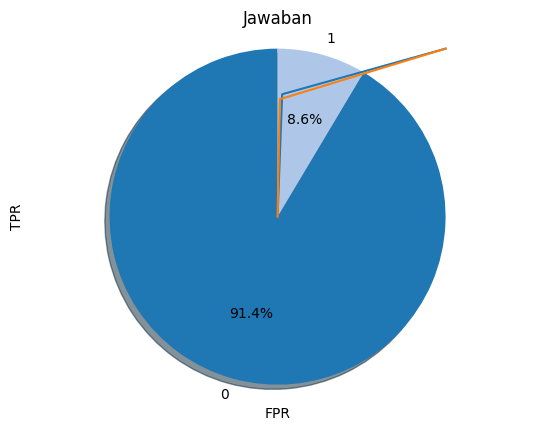

In [48]:
df_answer = df_result['Jawaban Asli'].value_counts()

labels_result = df_answer.index
quantity_result = df_answer.values
colors_result = plt.cm.tab20(range(len(labels_result)))

plt.title('Jawaban')
plt.pie(quantity_result, labels=labels_result, colors=colors_result,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

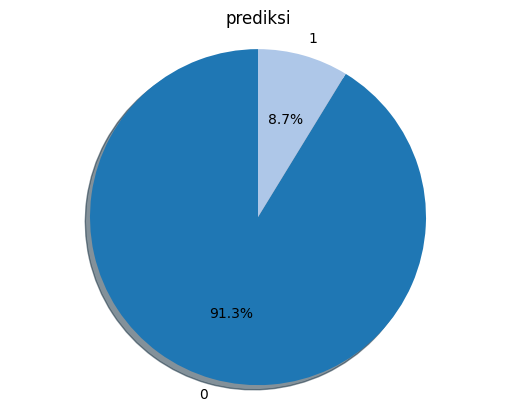

In [49]:
df_pred = df_result['pred Decision Tree'].value_counts()

labels_pred = df_pred.index
quantity_pred = df_pred.values
colors_pred = plt.cm.tab20(range(len(labels_pred)))

plt.title('prediksi')
plt.pie(quantity_pred, labels=labels_pred, colors=colors_pred,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show() 